In [ ]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

def fetch_data(tickers, start='2009-05-01', end='2025-01-01'):
    data_dict = {}
    for ticker in tickers:
        print(f"Fetching {ticker}...")
        df = yf.download(ticker, start=start, end=end)
        df.dropna(inplace=True)
        df['SMA50'] = df['Close'].rolling(window=50).mean()
        df['SMA200'] = df['Close'].rolling(window=200).mean()
        data_dict[ticker] = df
    return data_dict

In [ ]:

data_dict = fetch_data(['AAPL', 'JPM', 'XOM'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching AAPL...
Fetching JPM...
Fetching XOM...



[*********************100%***********************]  1 of 1 completed


In [ ]:

tickers = list(data_dict.keys())

In [ ]:

def add_indicators(df, ticker):
  # RSI
  delta = df[f'Close_{ticker}'].diff()
  gain = delta.clip(lower=0)
  loss = -delta.clip(upper=0)
  avg_gain = gain.rolling(window=14).mean()
  avg_loss = loss.rolling(window=14).mean()
  rs = avg_gain / avg_loss
  df['RSI'] = 100 - (100 / (1 + rs))

  # Bollinger Bands
  rolling_mean = df[f'Close_{ticker}'].rolling(window=20).mean()
  rolling_std = df[f'Close_{ticker}'].rolling(window=20).std()
  df['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
  df['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

  return df

In [ ]:

# Evaluation Metrics

def evaluate_strategy(trades, returns):
  total_return = sum(returns)
  avg_return = total_return / len(returns) if returns else 0
  wins = [r for r in returns if r > 0]
  losses = [r for r in returns if r <= 0]
  win_rate = len(wins) / len(returns) if returns else 0

  # Calculate equity curve (cumulative returns)
  equity_curve = [0]
  for r in returns:
    equity_curve.append(equity_curve[-1] + r)

  # Calculate max drawdown
  peak = equity_curve[0]
  max_drawdown = 0
  for value in equity_curve:
    if value > peak:
      peak = value
    drawdown = peak - value
    if drawdown > max_drawdown:
      max_drawdown = drawdown

  return {
        'total_return': total_return,
        'avg_return_per_trade': avg_return,
        'win_rate': win_rate,
        'max_drawdown': max_drawdown
    }

In [ ]:
# Flattening the column names

for ticker, df in data_dict.items():
    df.columns = [col[0] if col[1] == '' else f"{col[0]}_{col[1]}" for col in df.columns]
    data_dict[ticker] = df

In [ ]:
data_dict['XOM']

,Close_XOM,High_XOM,Low_XOM,Open_XOM,Volume_XOM,SMA50,SMA200
Date,,,,,,,
2009-05-01,37.262043,37.289435,36.204614,36.779897,27385000,NaN,NaN
2009-05-04,37.366161,37.755168,37.075780,37.530530,27306100,NaN,NaN
2009-05-05,37.064808,37.431894,36.796343,37.300401,19910300,NaN,NaN
2009-05-06,37.574348,37.585304,36.949753,37.278487,30814800,NaN,NaN
2009-05-07,37.766106,37.826374,37.048370,37.804458,32541600,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-24,104.494308,105.270160,103.806841,104.612154,7807000,114.108598,112.693226
2024-12-26,104.582695,105.113024,104.042550,104.612156,9652400,113.855629,112.697005
2024-12-27,104.572876,106.055825,103.875586,104.396100,11943900,113.596424,112.694936


In [ ]:
for ticker, df in data_dict.items():
  data_dict[ticker] = add_indicators(df, ticker)

In [ ]:
2

In [ ]:
print(df.head(3))         # Show first few rows
print(df.columns.tolist())  # Print column names
print(df.index[:5])       # Show how the index looks
print(type(df.index))     # Show index type

            Close_XOM   High_XOM    Low_XOM   Open_XOM  Volume_XOM  SMA50  \
Date                                                                        
2009-05-01  37.262043  37.289435  36.204614  36.779897    27385000    NaN   
2009-05-04  37.366161  37.755168  37.075780  37.530530    27306100    NaN   
2009-05-05  37.064808  37.431894  36.796343  37.300401    19910300    NaN   

            SMA200  RSI  Bollinger_Upper  Bollinger_Lower  
Date                                                       
2009-05-01     NaN  NaN              NaN              NaN  
2009-05-04     NaN  NaN              NaN              NaN  
2009-05-05     NaN  NaN              NaN              NaN  
['Close_XOM', 'High_XOM', 'Low_XOM', 'Open_XOM', 'Volume_XOM', 'SMA50', 'SMA200', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower']
DatetimeIndex(['2009-05-01', '2009-05-04', '2009-05-05', '2009-05-06',
               '2009-05-07'],
              dtype='datetime64[ns]', name='Date', freq=None)
<class 'pandas.core.inde

In [ ]:
data_dict['JPM'].head(20)

,Close_JPM,High_JPM,Low_JPM,Open_JPM,Volume_JPM,SMA50,SMA200,RSI,Bollinger_Upper,Bollinger_Lower
0,26.938622,27.214466,26.750238,27.086634,34644100,27.693316,27.047190,54.616328,28.175124,24.885358
1,27.187567,27.254845,26.756980,26.871353,31809500,27.676094,27.063197,55.878661,27.549639,25.309680
2,26.931898,27.382671,26.844437,26.985723,40290200,27.660343,27.081177,57.032228,27.487570,25.337436
3,27.483595,27.786352,27.079920,27.180840,43898900,27.656165,27.093872,57.741106,27.645266,25.293442
4,26.830984,27.752710,26.750247,27.517233,52233100,27.639202,27.109940,45.775628,27.677848,25.305939
5,27.483595,27.564332,26.911722,26.945361,44645000,27.634217,27.116872,53.240803,27.798678,25.347253
6,27.342319,27.375959,26.709895,27.019379,46718100,27.630573,27.133519,66.570390,27.888319,25.345749
7,28.237122,28.465871,27.315393,27.375945,67699100,27.633939,27.156215,72.405459,28.163174,25.238419
8,28.142931,28.378407,27.860357,28.277488,34606800,27.647651,27.182830,76.714171,28.373925,25.222106
9,28.001644,28.526424,27.826719,28.243850,33891600,27.651817,27.203746,72.276006,28.528017,25.201899


In [ ]:
def run_backtest(df, ticker,
                 initial_capital=10000,
                 weight_sma=0.6, weight_rsi=0.3, weight_boll=0.3,
                 entry_threshold=0.5, exit_threshold=0.5):

    position = 0          # 0 means no position, 1 means holding stock
    buy_price = 0
    shares_held = 0       # Number of shares currently held
    capital = initial_capital  # Cash available
    returns = []
    trades = []
    capital_timeline = {}

    for i in range(1, len(df)):
        label_yesterday = df.index[i - 1]
        label_today = df.index[i]

        # Extract values
        sma_yest_50 = df.at[label_yesterday, 'SMA50']
        sma_yest_200 = df.at[label_yesterday, 'SMA200']
        sma_today_50 = df.at[label_today, 'SMA50']
        sma_today_200 = df.at[label_today, 'SMA200']

        rsi_today = df.at[label_today, 'RSI']

        close_yesterday = df.at[label_yesterday, f'Close_{ticker}']
        close_today = df.at[label_today, f'Close_{ticker}']

        boll_lower_yest = df.at[label_yesterday, 'Bollinger_Lower']
        boll_upper_yest = df.at[label_yesterday, 'Bollinger_Upper']
        boll_lower_today = df.at[label_today, 'Bollinger_Lower']
        boll_upper_today = df.at[label_today, 'Bollinger_Upper']

        # Skip if any required value is missing
        if any(pd.isna(x) for x in [sma_yest_50, sma_yest_200, sma_today_50, sma_today_200, rsi_today,
                                    close_yesterday, close_today, boll_lower_yest, boll_upper_yest,
                                    boll_lower_today, boll_upper_today]):
            continue

        # ---------- ENTRY (BUY) ---------- #
        entry_score = 0.0

        # Trend confirmation
        if sma_yest_50 < sma_yest_200 and sma_today_50 > sma_today_200:
            entry_score += weight_sma

        # Momentum confirmation
        if rsi_today < 40:
            entry_score += weight_rsi

        # Volatility confirmation
        if close_yesterday < boll_lower_yest and close_today > boll_lower_today:
            entry_score += weight_boll

        if entry_score >= entry_threshold and position == 0:
            # Calculate number of shares to buy based on available capital
            shares_to_buy = int(capital // close_today)
            if shares_to_buy > 0:
                buy_price = close_today
                position = 1
                shares_held = shares_to_buy
                capital -= shares_to_buy * buy_price  # deduct cost from capital
                trades.append((label_today, 'BUY', buy_price, shares_held))

        # ---------- EXIT (SELL) ---------- #
        exit_score = 0.0

        if sma_yest_50 > sma_yest_200 and sma_today_50 < sma_today_200:
            exit_score += weight_sma

        if rsi_today > 70:
            exit_score += weight_rsi

        if close_yesterday > boll_upper_yest and close_today < boll_upper_today:
            exit_score += weight_boll

        if exit_score >= exit_threshold and position == 1:
            sell_price = close_today
            position = 0
            profit = (sell_price - buy_price) * shares_held
            capital += sell_price * shares_held  # add proceeds back to capital
            returns.append(profit)
            trades.append((label_today, 'SELL', sell_price, shares_held))
            shares_held = 0
        capital_timeline[label_today] = capital + (shares_held * close_today if position == 1 else 0)

    total_return = sum(returns)
    avg_return = total_return / len(returns) if returns else 0
    ending_capital = capital + (shares_held * close_today if position == 1 else 0)

    return trades, total_return, avg_return, returns, ending_capital, capital_timeline



def visualize(df, ticker, trades):
    plt.figure(figsize=(14, 6))
    plt.plot(df[f'Close_{ticker}'], label='Close Price', alpha=0.6)
    plt.plot(df['SMA50'], label='SMA50')
    plt.plot(df['SMA200'], label='SMA200')

    shown_labels = {'BUY': False, 'SELL': False}

    for date, action, price, shares in trades:
        color = 'green' if action == 'BUY' else 'red'
        marker = '^' if action == 'BUY' else 'v'

        # Show label only once
        label = action if not shown_labels[action] else ""
        shown_labels[action] = True

        plt.scatter(date, price, color=color, label=label, marker=marker)

    plt.title(f"{ticker} - SMA - RSI - Bollinger Bands Strategy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



📊 Backtesting AAPL...
Total Profit: $61601.72 | Average per trade: $1811.82 | Trades: 34


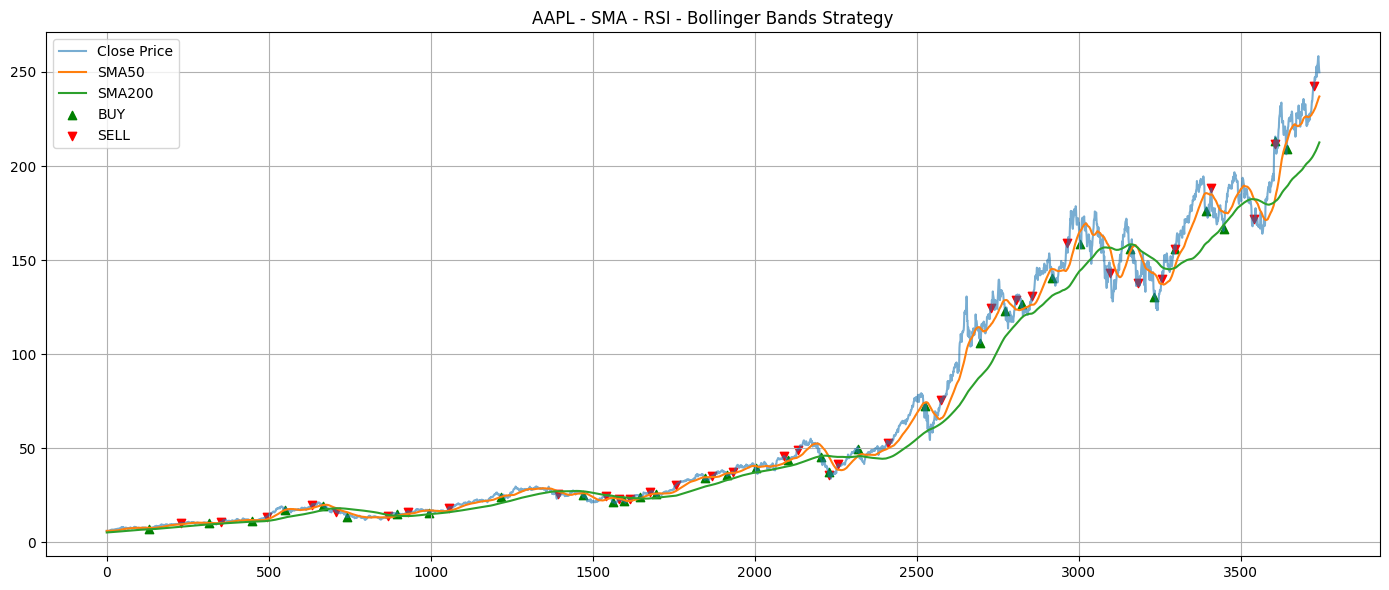

Backtest results for AAPL:
Total Return: $61601.72
Average Return per Trade: $1811.82
Win Rate: 79.41%
Max Drawdown: $13162.73
Money Remaining: $71601.72
------

📊 Backtesting JPM...
Total Profit: $37961.78 | Average per trade: $1084.62 | Trades: 35


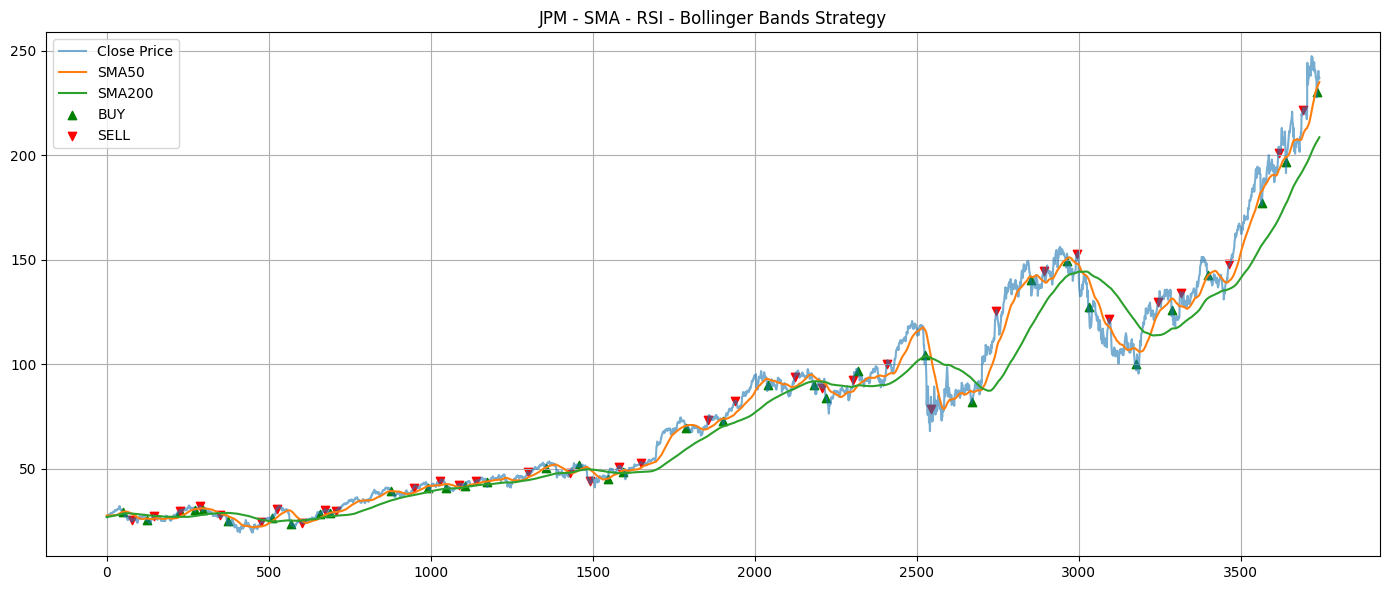

Backtest results for JPM:
Total Return: $37961.78
Average Return per Trade: $1084.62
Win Rate: 74.29%
Max Drawdown: $5705.56
Money Remaining: $49350.01
------

📊 Backtesting XOM...
Total Profit: $4740.59 | Average per trade: $148.14 | Trades: 32


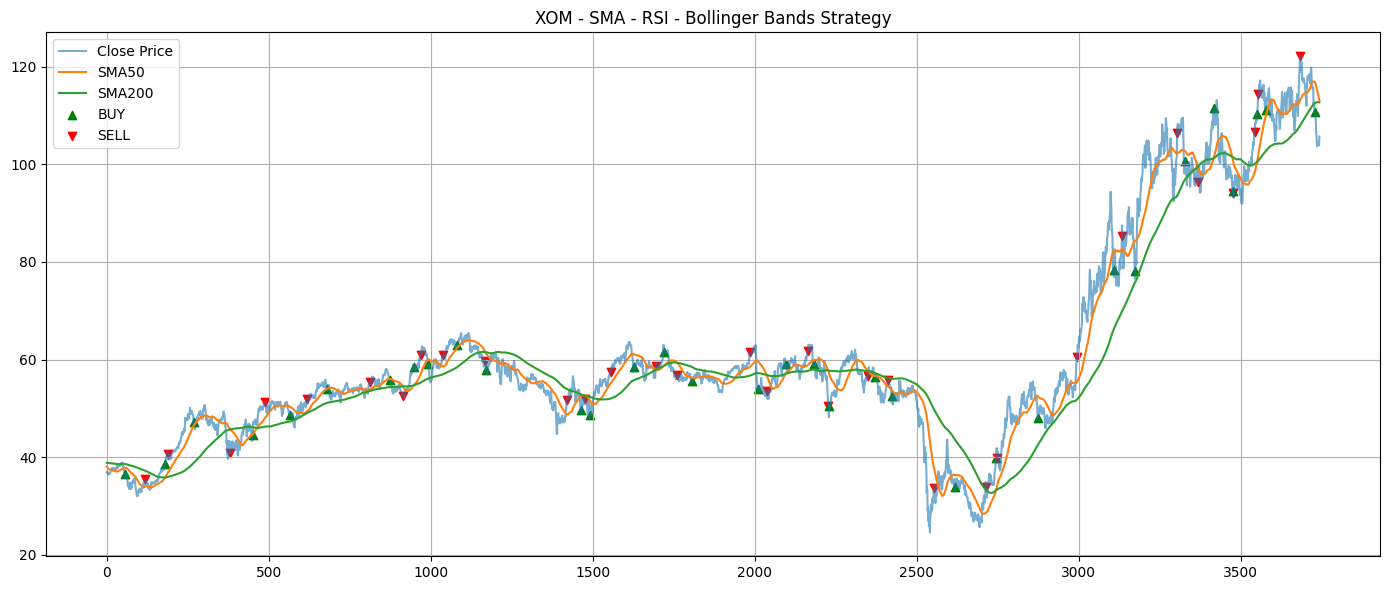

Backtest results for XOM:
Total Return: $4740.59
Average Return per Trade: $148.14
Win Rate: 59.38%
Max Drawdown: $4925.22
Money Remaining: $14074.44
------


In [ ]:
for ticker in tickers:
    print(f"\n📊 Backtesting {ticker}...")
    df = data_dict[ticker]
    trades, total_return, avg_return, returns, ending_capital, capital_timeline = run_backtest(df, ticker)
    evaluation = evaluate_strategy(trades, returns)
    print(f"Total Profit: ${total_return:.2f} | Average per trade: ${avg_return:.2f} | Trades: {len(trades)//2}")
    visualize(df, ticker, trades)
    print(f"Backtest results for {ticker}:")
    print(f"Total Return: ${evaluation['total_return']:.2f}")
    print(f"Average Return per Trade: ${evaluation['avg_return_per_trade']:.2f}")
    print(f"Win Rate: {evaluation['win_rate']*100:.2f}%")
    print(f"Max Drawdown: ${evaluation['max_drawdown']:.2f}")
    print(f"Money Remaining: ${ending_capital:.2f}")
    print("------")

In [ ]:
# Portfolio management

portfolio = {
    'AAPL': {'capital': 3000, 'shares': 0, 'trades': []},
    'JPM': {'capital': 4000, 'shares': 0, 'trades': []},
    'XOM': {'capital': 3000, 'shares': 0, 'trades': []},
}

portfolio_allocation = {
    'JPM': 4000,
    'AAPL': 3000,
    'XOM': 3000
}

portfolio_returns = {}
portfolio_ending_capital = {}
portfolio_total_profit = 0
portfolio_capital_timelines = {}


📊 Backtesting AAPL...
Total Profit: $18426.42 | Average per trade: $541.95 | Trades: 34


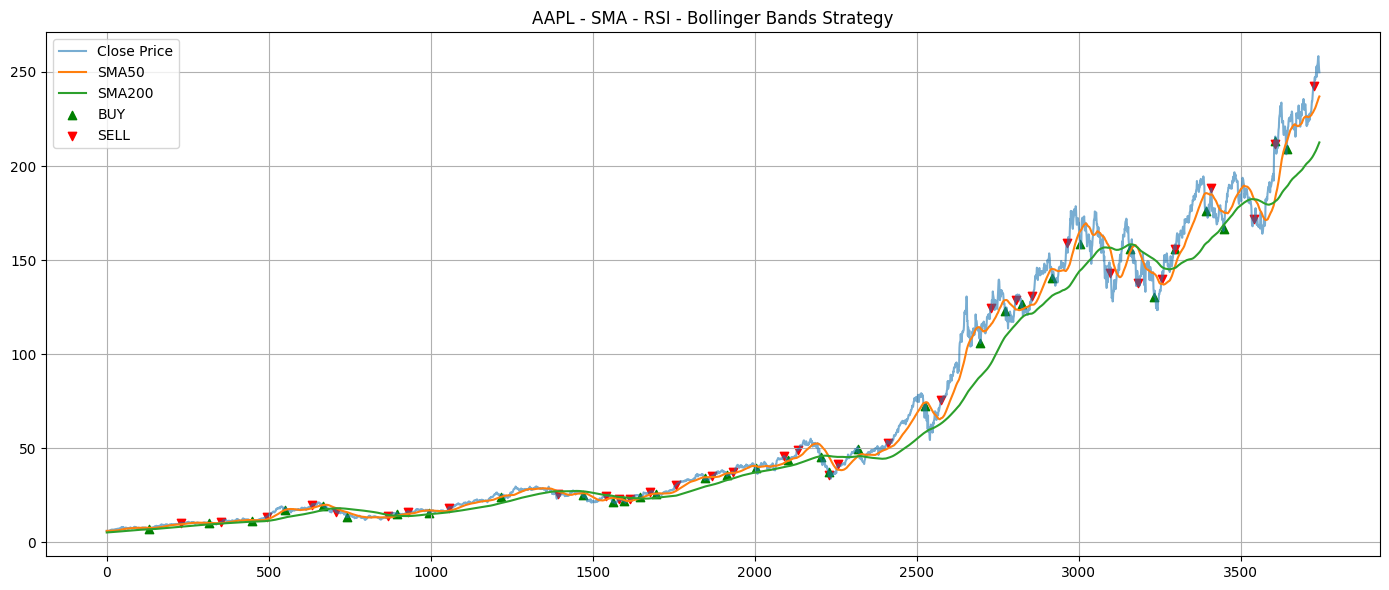

Backtest results for AAPL:
Total Return: $18426.42
Average Return per Trade: $541.95
Win Rate: 79.41%
Max Drawdown: $3935.76
Money Remaining (Ending Capital): $21426.42
------

📊 Backtesting JPM...
Total Profit: $15118.05 | Average per trade: $431.94 | Trades: 35


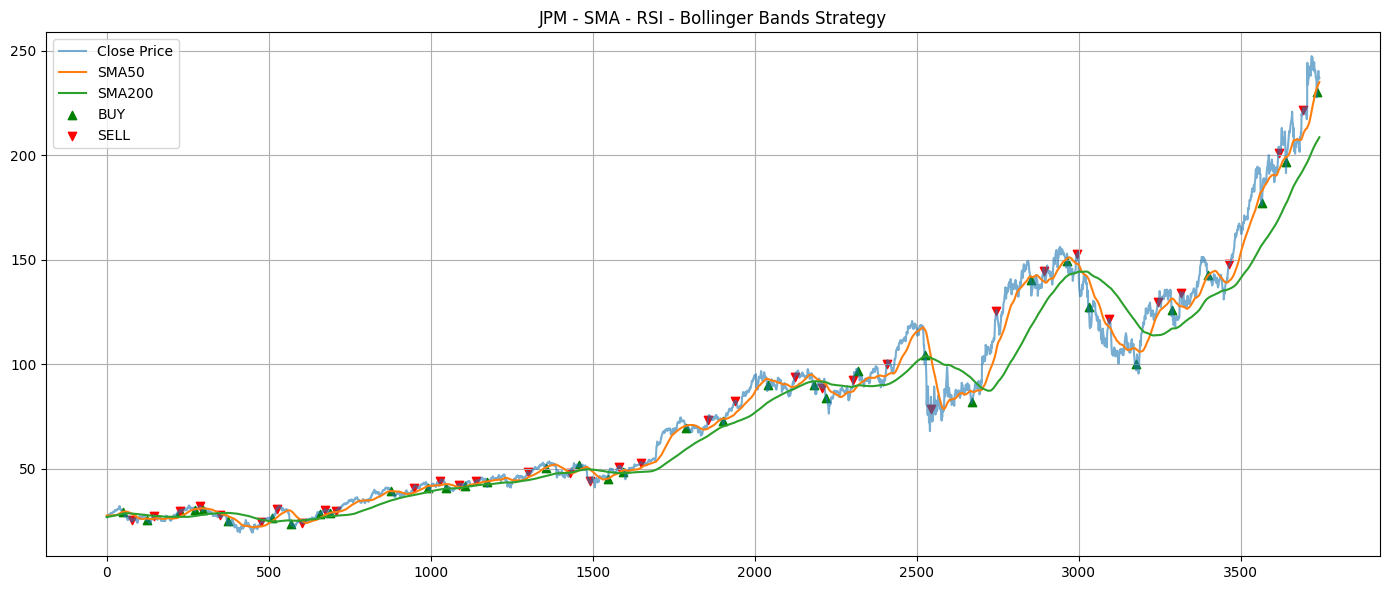

Backtest results for JPM:
Total Return: $15118.05
Average Return per Trade: $431.94
Win Rate: 74.29%
Max Drawdown: $2276.99
Money Remaining (Ending Capital): $19665.33
------

📊 Backtesting XOM...
Total Profit: $1435.01 | Average per trade: $44.84 | Trades: 32


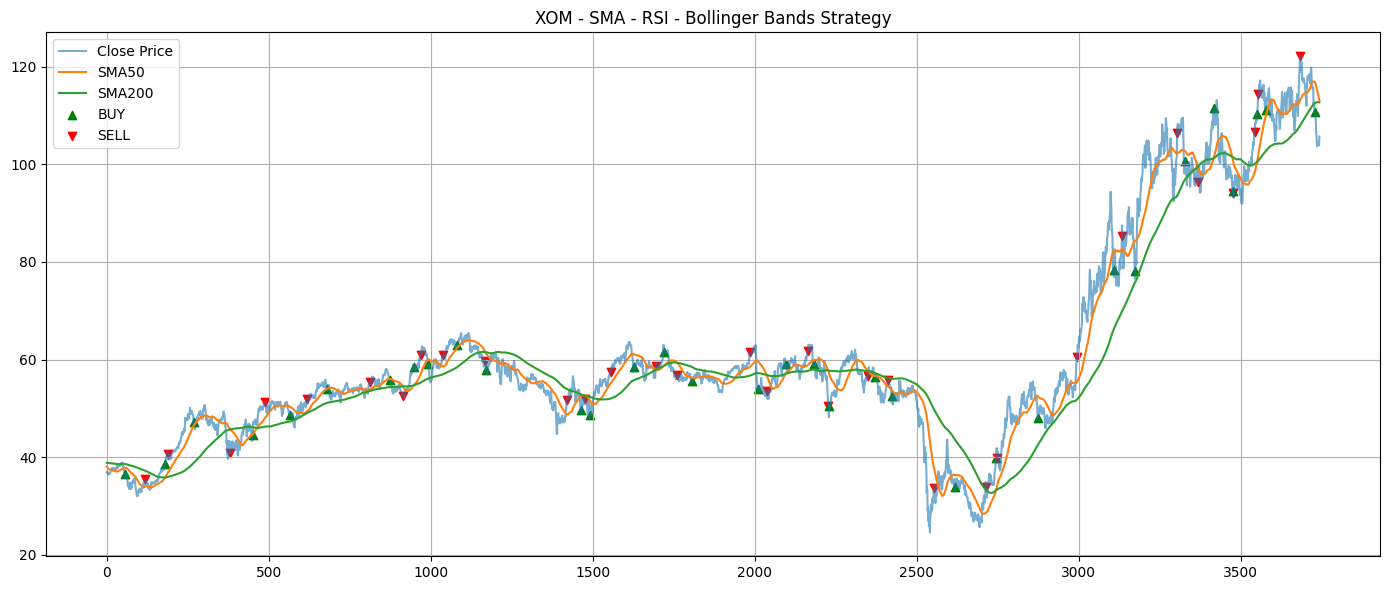

Backtest results for XOM:
Total Return: $1435.01
Average Return per Trade: $44.84
Win Rate: 59.38%
Max Drawdown: $1460.42
Money Remaining (Ending Capital): $4234.67
------


In [ ]:
for ticker in tickers:
    print(f"\n📊 Backtesting {ticker}...")

    df = data_dict[ticker]
    capital = portfolio_allocation[ticker]

    trades, total_return, avg_return, returns, ending_capital, capital_timeline = run_backtest(
        df, ticker,
        initial_capital=capital
    )

    evaluation = evaluate_strategy(trades, returns)

    print(f"Total Profit: ${total_return:.2f} | Average per trade: ${avg_return:.2f} | Trades: {len(trades)//2}")
    visualize(df, ticker, trades)
    print(f"Backtest results for {ticker}:")
    print(f"Total Return: ${evaluation['total_return']:.2f}")
    print(f"Average Return per Trade: ${evaluation['avg_return_per_trade']:.2f}")
    print(f"Win Rate: {evaluation['win_rate']*100:.2f}%")
    print(f"Max Drawdown: ${evaluation['max_drawdown']:.2f}")
    print(f"Money Remaining (Ending Capital): ${ending_capital:.2f}")
    print("------")

    # Store portfolio data
    portfolio_returns[ticker] = total_return
    portfolio_ending_capital[ticker] = ending_capital
    portfolio_total_profit += total_return
    portfolio_capital_timelines[ticker] = capital_timeline

In [ ]:
print("\n Portfolio Summary:")
total_starting_capital = sum(portfolio_allocation.values())
total_ending_capital = sum(portfolio_ending_capital.values())
print(f"Initial Portfolio Capital: ${total_starting_capital}")
print(f"Ending Portfolio Capital:  ${total_ending_capital:.2f}")
print(f"Total Portfolio Profit:   ${portfolio_total_profit:.2f}")


 Portfolio Summary:
Initial Portfolio Capital: $10000
Ending Portfolio Capital:  $45326.42
Total Portfolio Profit:   $34979.48


In [ ]:
portfolio_df = pd.DataFrame(portfolio_capital_timelines)
portfolio_df = portfolio_df.ffill().fillna(0)
portfolio_df['Total_Portfolio_Value'] = portfolio_df.sum(axis=1)

<ipython-input-63-4a686d064337>:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


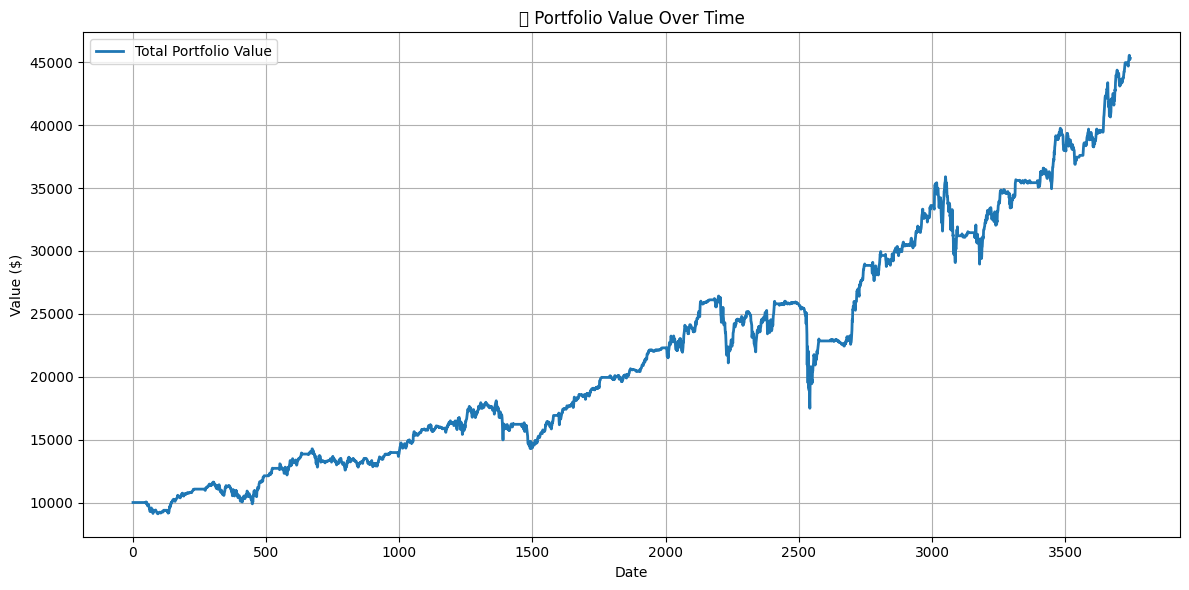

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Total_Portfolio_Value'], label='Total Portfolio Value', linewidth=2)
plt.title("📈 Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-64-799757d41c32>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


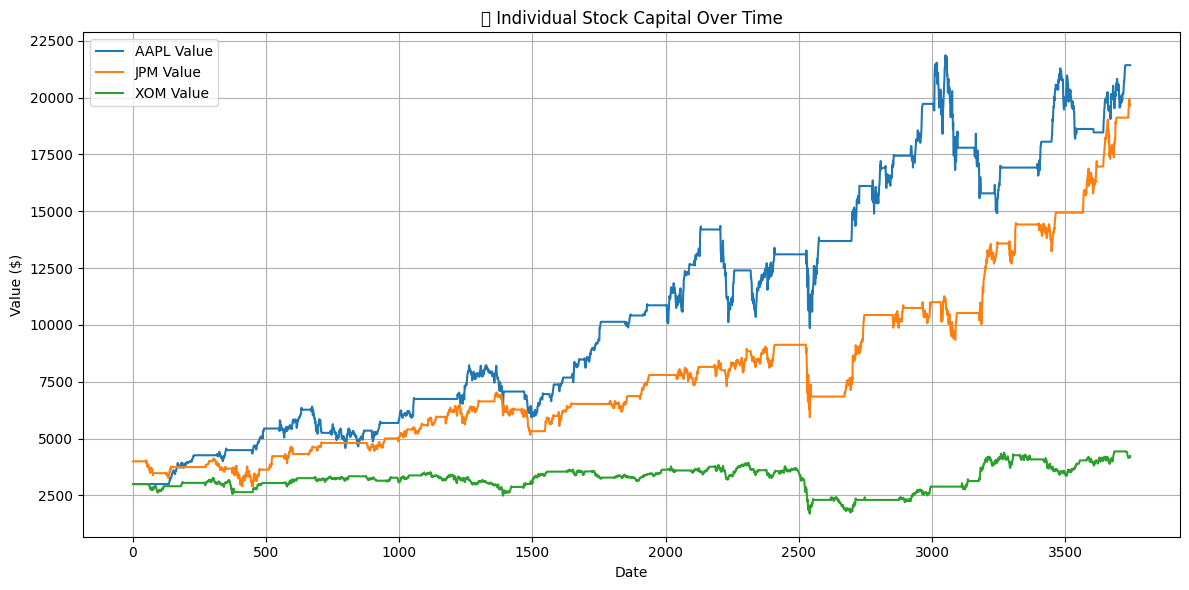

In [ ]:
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(portfolio_df[ticker], label=f'{ticker} Value')

plt.title("📊 Individual Stock Capital Over Time")
plt.xlabel("Date")
plt.ylabel("Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Dynamic allocation without rules

def calculate_recent_return(prices, days=10):
    return (prices[-1] - prices[-days]) / prices[-days]

def dynamic_allocation_engine(data_dict, initial_allocations, rebalance_interval=10, lookback_days=10):
    tickers = list(initial_allocations.keys())
    portfolio_value = []
    allocations = initial_allocations.copy()
    capital = sum(initial_allocations.values())
    holdings = {ticker: 0 for ticker in tickers}
    portfolio_values = []
    dates = []

    for i in range(lookback_days, len(data_dict[tickers[0]])):
        # Rebalance on interval
        date = df.index[i]
        if (i - lookback_days) % rebalance_interval == 0:
            recent_returns = {
                ticker: calculate_recent_return(data_dict[ticker][f'Close_{ticker}'].values[i - lookback_days:i])
                for ticker in tickers
            }

            total_positive_return = sum(max(0, r) for r in recent_returns.values())
            if total_positive_return > 0:
                allocations = {
                    ticker: (max(0, recent_returns[ticker]) / total_positive_return) * capital
                    for ticker in tickers
                }
            else:
                # Equal allocation fallback
                allocations = {ticker: capital / len(tickers) for ticker in tickers}

            # Recalculate holdings
            for ticker in tickers:
                price = data_dict[ticker][f'Close_{ticker}'].iloc[i]
                holdings[ticker] = int(allocations[ticker] // price)

        # Compute portfolio value
        current_value = sum(
            holdings[ticker] * data_dict[ticker][f'Close_{ticker}'].iloc[i]
            for ticker in tickers
        )
        portfolio_value.append(current_value)
        dates.append(date)
    return portfolio_value, dates


In [ ]:
initial_alloc = {'JPM': 4000, 'AAPL': 3000, 'XOM': 3000}
portfolio_growth_dynamic, dates = dynamic_allocation_engine(data_dict, initial_alloc)


<ipython-input-67-e197b5e5d57c>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


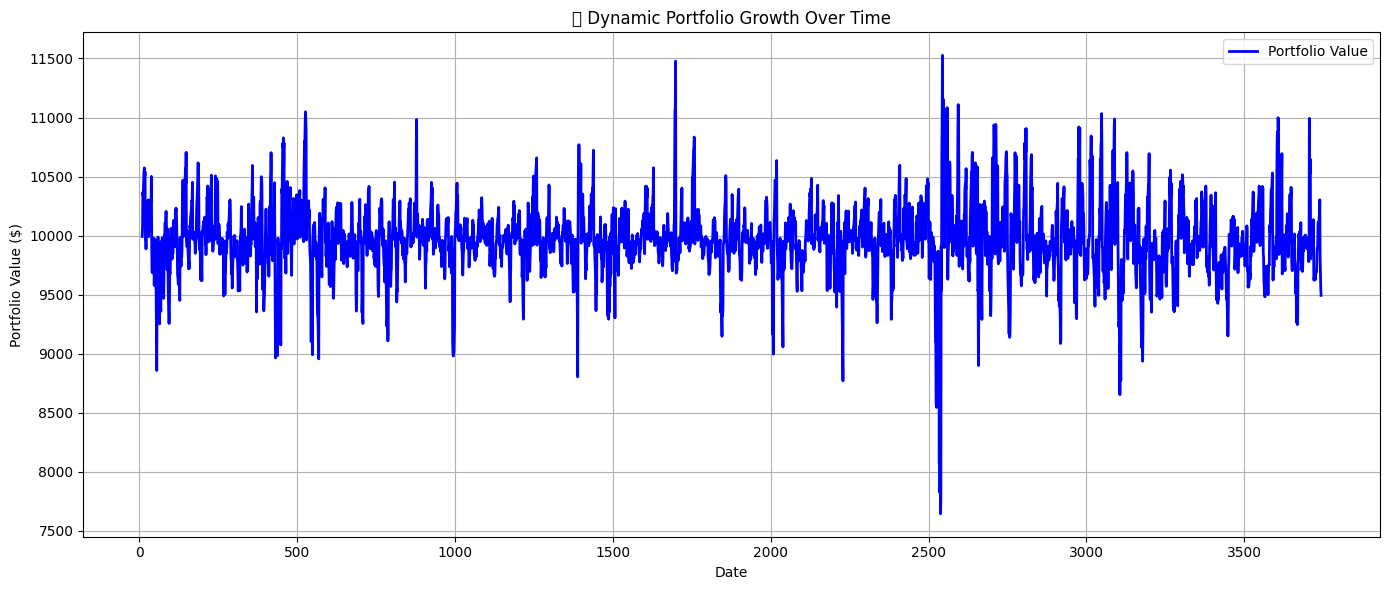

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(dates, portfolio_growth_dynamic, label='Portfolio Value', color='blue', linewidth=2)

plt.title("📈 Dynamic Portfolio Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


This is the end of rule based portfolio for now, will continue hybrid implementation in a separate notebook.

In [ ]:
"""# Implementing the hybrid (dynamic-rule based) portfolio


def calculate_recent_return(prices, days=10):
    return (prices[-1] - prices[-days]) / prices[-days]

def score_stock(df, index, ticker, weight_sma=0.4, weight_rsi=0.3, weight_boll=0.3):
    score = 0

    # Access columns using the correct name ('Close', 'SMA50', etc.)
    try:
        sma_50 = df.at[df.index[index], 'SMA50']
        sma_200 = df.at[df.index[index], 'SMA200']
        rsi = df.at[df.index[index], 'RSI']
        close = df.at[df.index[index], f'Close_{ticker}'] # Corrected column name access
        boll_lower = df.at[df.index[index], 'Bollinger_Lower']
        boll_upper = df.at[df.index[index], 'Bollinger_Upper']
    except KeyError as e:
         # This should not happen with the fix, but helpful for debugging if columns are missing
         print(f"Error accessing data for {ticker} at index {df.index[index]}: {e}")
         return 0 # Return a score of 0 if data access fails


    # Skip if any required value is missing after fetching
    if any(pd.isna(x) for x in [sma_50, sma_200, rsi, close, boll_lower, boll_upper]):
        return 0 # Return a score of 0 if data is missing for this day/stock


    if sma_50 > sma_200:
        score += weight_sma

    if rsi < 40:
        score += weight_rsi
    elif rsi > 70:
        score -= weight_rsi

    if close < boll_lower:
        score += weight_boll
    elif close > boll_upper:
        score -= weight_boll

    return score"""


'# Implementing the hybrid (dynamic-rule based) portfolio\n\n\ndef calculate_recent_return(prices, days=10):\n    return (prices[-1] - prices[-days]) / prices[-days]\n\ndef score_stock(df, index, ticker, weight_sma=0.4, weight_rsi=0.3, weight_boll=0.3):\n    score = 0\n\n    # Access columns using the correct name (\'Close\', \'SMA50\', etc.)\n    try:\n        sma_50 = df.at[df.index[index], \'SMA50\']\n        sma_200 = df.at[df.index[index], \'SMA200\']\n        rsi = df.at[df.index[index], \'RSI\']\n        close = df.at[df.index[index], f\'Close_{ticker}\'] # Corrected column name access\n        boll_lower = df.at[df.index[index], \'Bollinger_Lower\']\n        boll_upper = df.at[df.index[index], \'Bollinger_Upper\']\n    except KeyError as e:\n         # This should not happen with the fix, but helpful for debugging if columns are missing\n         print(f"Error accessing data for {ticker} at index {df.index[index]}: {e}")\n         return 0 # Return a score of 0 if data access f

In [ ]:
"""# Modified hybrid_allocation_engine to pass the ticker to score_stock
def hybrid_allocation_engine(data_dict, initial_allocations, rebalance_interval=10, lookback_days=60,
                              alpha=0.4, beta=0.6):
    tickers = list(initial_allocations.keys())
    capital = sum(initial_allocations.values())
    holdings = {ticker: 0 for ticker in tickers}
    portfolio_values = []
    dates = []

    # Ensure there is enough data for the lookback period in all dataframes
    min_len = min(len(df) for df in data_dict.values())
    if min_len <= lookback_days:
        print(f"Warning: Not enough data for lookback period. Minimum data length is {min_len}, lookback is {lookback_days}.")
        return [], []

    for i in range(lookback_days, min_len):
        date = data_dict[tickers[0]].index[i]

        if (i - lookback_days) % rebalance_interval == 0:
            total_score = 0
            scores = {}

            for ticker in tickers:
                df = data_dict[ticker]
                # Example scoring based on SMA and RSI (add real logic)
                sma_score = 1 if df.iloc[i]['SMA50'] > df.iloc[i]['SMA200'] else 0
                rsi_score = 1 if df.iloc[i]['RSI'] < 40 else 0
                score = alpha * sma_score + beta * rsi_score
                scores[ticker] = score
                total_score += score

            if total_score > 0:
                allocations = {ticker: (score / total_score) * capital for ticker, score in scores.items()}
                for ticker in tickers:
                    price = data_dict[ticker].iloc[i][f'Close_{ticker}']
                    holdings[ticker] = int(allocations[ticker] / price)

        # Calculate total portfolio value
        total_value = sum(data_dict[ticker].iloc[i][f'Close_{ticker}'] * holdings[ticker] for ticker in tickers)
        portfolio_values.append(total_value)
        dates.append(date)

    return dates, portfolio_values


"""

'# Modified hybrid_allocation_engine to pass the ticker to score_stock\ndef hybrid_allocation_engine(data_dict, initial_allocations, rebalance_interval=10, lookback_days=60,\n                              alpha=0.4, beta=0.6):\n    tickers = list(initial_allocations.keys())\n    capital = sum(initial_allocations.values())\n    holdings = {ticker: 0 for ticker in tickers}\n    portfolio_values = []\n    dates = []\n\n    # Ensure there is enough data for the lookback period in all dataframes\n    min_len = min(len(df) for df in data_dict.values())\n    if min_len <= lookback_days:\n        print(f"Warning: Not enough data for lookback period. Minimum data length is {min_len}, lookback is {lookback_days}.")\n        return [], []\n\n    for i in range(lookback_days, min_len):\n        date = data_dict[tickers[0]].index[i]\n\n        if (i - lookback_days) % rebalance_interval == 0:\n            total_score = 0\n            scores = {}\n\n            for ticker in tickers:\n              

In [ ]:
"""initial_alloc = {'JPM': 4000, 'AAPL': 3000, 'XOM': 3000}"""

"initial_alloc = {'JPM': 4000, 'AAPL': 3000, 'XOM': 3000}"

In [ ]:
"""portfolio_growth, dates = hybrid_allocation_engine(
    data_dict=data_dict,
    initial_allocations=initial_alloc,
    rebalance_interval=10,
    lookback_days=10,
    alpha=0.6,  # Weight for return-based score
    beta=0.4    # Weight for rule-based score
)"""

'portfolio_growth, dates = hybrid_allocation_engine(\n    data_dict=data_dict,\n    initial_allocations=initial_alloc,\n    rebalance_interval=10,\n    lookback_days=10,\n    alpha=0.6,  # Weight for return-based score\n    beta=0.4    # Weight for rule-based score\n)'

In [ ]:
"""import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(dates, portfolio_growth, label='Hybrid Portfolio Value', color='green', linewidth=2)
plt.plot(dates, portfolio_growth_dynamic, label='Dynamic Portfolio Value', color='blue', linewidth=2)
plt.title("📈 Hybrid Portfolio Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()"""


'import matplotlib.pyplot as plt\n\nplt.figure(figsize=(14, 6))\nplt.plot(dates, portfolio_growth, label=\'Hybrid Portfolio Value\', color=\'green\', linewidth=2)\nplt.plot(dates, portfolio_growth_dynamic, label=\'Dynamic Portfolio Value\', color=\'blue\', linewidth=2)\nplt.title("📈 Hybrid Portfolio Growth Over Time")\nplt.xlabel("Date")\nplt.ylabel("Portfolio Value ($)")\nplt.grid(True)\nplt.legend()\nplt.tight_layout()\nplt.show()'